# Data preprocessing

In [49]:
pip install hurst nolds

  Obtaining dependency information for nolds from https://files.pythonhosted.org/packages/ec/51/4748c375a59c195be43aef5645fb17b48572c857384bfbc363eaecfcdfe4/nolds-0.6.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.stattools import acf, pacf
import nolds

In [31]:
path = os.getcwd()
player_time = pd.read_csv(path + '/player_time.csv')
matches = pd.read_csv(path + '/match.csv')

#radiant are slots 0-4, dire are slots 128-132


In [3]:
#print(player_time.head())
#print(player_time.shape)


In [32]:

player_time['mean_gold_rad'] = player_time[['gold_t_0', 'gold_t_1', 'gold_t_2', 'gold_t_3', 'gold_t_4']].sum(axis=1)
player_time['mean_xp_rad'] = player_time[['xp_t_0', 'xp_t_1', 'xp_t_2', 'xp_t_3', 'xp_t_4']].sum(axis=1)
player_time['mean_lh_rad'] = player_time[['lh_t_0', 'lh_t_1', 'lh_t_2', 'lh_t_3', 'lh_t_4']].sum(axis=1)
player_time['mean_gold_dire'] = player_time[['gold_t_128', 'gold_t_129', 'gold_t_130', 'gold_t_131', 'gold_t_132']].sum(axis=1)
player_time['mean_xp_dire'] = player_time[['xp_t_128', 'xp_t_129', 'xp_t_130', 'xp_t_131', 'xp_t_132']].sum(axis=1)
player_time['mean_lh_dire'] = player_time[['lh_t_128', 'lh_t_129', 'lh_t_130', 'lh_t_131', 'lh_t_132']].sum(axis=1)

player_time = player_time.drop(['gold_t_0', 'gold_t_1', 'gold_t_2', 'gold_t_3', 'gold_t_4', 'xp_t_0', 'xp_t_1', 'xp_t_2', 'xp_t_3', 'xp_t_4'], axis=1)
player_time = player_time.drop(['gold_t_128', 'gold_t_129', 'gold_t_130', 'gold_t_131', 'gold_t_132', 'xp_t_128', 'xp_t_129', 'xp_t_130', 'xp_t_131', 'xp_t_132'], axis=1)
player_time = player_time.drop(['lh_t_0', 'lh_t_1', 'lh_t_2', 'lh_t_3', 'lh_t_4', 'lh_t_128', 'lh_t_129', 'lh_t_130', 'lh_t_131', 'lh_t_132'], axis=1)

In [155]:
#print(player_time.head(10))


In [33]:
time_list = player_time['times']/60
player_time['times_minutes'] = time_list.astype(int)
#print(player_time.columns)
player_time = player_time[['match_id', 'times', 'times_minutes', 'mean_gold_rad', 'mean_xp_rad', 'mean_lh_rad', 'mean_gold_dire', 'mean_xp_dire', 'mean_lh_dire']]


In [34]:
print(player_time.head())
print(player_time.shape)


   match_id  times  times_minutes  mean_gold_rad  mean_xp_rad  mean_lh_rad  \
0         0      0              0              0            0            0   
1         0     60              1           1113          692            2   
2         0    120              2           2471         2376           10   
3         0    180              3           3490         3634           23   
4         0    240              4           4950         5285           33   

   mean_gold_dire  mean_xp_dire  mean_lh_dire  
0               0             0             0  
1            1370           692            10  
2            2726          2318            26  
3            4057          3543            40  
4            5500          5007            53  
(2209778, 9)


In [35]:
matches = matches.drop(['start_time', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_dire', 'barracks_status_radiant', 'first_blood_time', 'game_mode', 'negative_votes', 'positive_votes', 'cluster'], axis=1)
matches.head()

,match_id,duration,radiant_win
0,0,2375,True
1,1,2582,False
2,2,2716,False
3,3,3085,False
4,4,1887,True


In [36]:
player_time_final = player_time.merge(matches[['match_id', 'radiant_win']], on='match_id', how='left')

player_time_final['mean_gold_w'] = player_time_final.apply(
    lambda row: row['mean_gold_rad'] if row['radiant_win'] else row['mean_gold_dire'], axis=1
)

player_time_final['mean_gold_l'] = player_time_final.apply(
    lambda row: row['mean_gold_dire'] if row['radiant_win'] else row['mean_gold_rad'], axis=1
)

player_time_final['mean_xp_w'] = player_time_final.apply(
    lambda row: row['mean_xp_rad'] if row['radiant_win'] else row['mean_xp_dire'], axis=1
)

player_time_final['mean_xp_l'] = player_time_final.apply(
    lambda row: row['mean_xp_dire'] if row['radiant_win'] else row['mean_xp_rad'], axis=1
)

player_time_final['mean_lh_w'] = player_time_final.apply(
    lambda row: row['mean_lh_rad'] if row['radiant_win'] else row['mean_lh_dire'], axis=1
)

player_time_final['mean_lh_l'] = player_time_final.apply(
    lambda row: row['mean_lh_dire'] if row['radiant_win'] else row['mean_lh_rad'], axis=1
)


   match_id  times  times_minutes  mean_gold_rad  mean_xp_rad  mean_lh_rad  \
0         0      0              0              0            0            0   
1         0     60              1           1113          692            2   
2         0    120              2           2471         2376           10   
3         0    180              3           3490         3634           23   
4         0    240              4           4950         5285           33   

   mean_gold_dire  mean_xp_dire  mean_lh_dire  radiant_win  mean_gold_w  \
0               0             0             0         True            0   
1            1370           692            10         True         1113   
2            2726          2318            26         True         2471   
3            4057          3543            40         True         3490   
4            5500          5007            53         True         4950   

   mean_gold_l  mean_xp_w  mean_xp_l  mean_lh_w  mean_lh_l  
0            0     

(array([2.00000e+05, 1.49988e+05, 1.99923e+05, 1.49857e+05, 1.49751e+05,
        1.99350e+05, 1.48800e+05, 1.47095e+05, 1.89271e+05, 1.32003e+05,
        1.19448e+05, 1.32566e+05, 7.90410e+04, 7.92610e+04, 4.30390e+04,
        3.05870e+04, 2.64380e+04, 1.24830e+04, 8.06000e+03, 6.37900e+03,
        2.63600e+03, 1.54300e+03, 1.12800e+03, 3.93000e+02, 2.56000e+02,
        1.09000e+02, 6.60000e+01, 5.30000e+01, 2.60000e+01, 1.80000e+01,
        2.00000e+01, 1.20000e+01, 1.20000e+01, 1.10000e+01, 3.00000e+00,
        4.00000e+00, 3.00000e+00, 3.00000e+00, 4.00000e+00, 3.00000e+00,
        3.00000e+00, 4.00000e+00, 3.00000e+00, 3.00000e+00, 4.00000e+00,
        3.00000e+00, 4.00000e+00, 3.00000e+00, 3.00000e+00, 4.00000e+00,
        3.00000e+00, 3.00000e+00, 4.00000e+00, 3.00000e+00, 3.00000e+00,
        4.00000e+00, 3.00000e+00, 4.00000e+00, 3.00000e+00, 3.00000e+00,
        4.00000e+00, 3.00000e+00, 3.00000e+00, 4.00000e+00, 3.00000e+00,
        3.00000e+00, 4.00000e+00, 3.00000e+00, 4.00

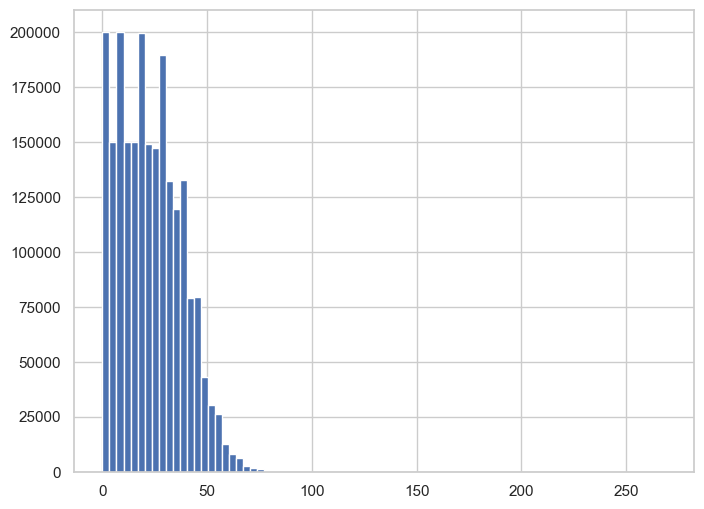

In [37]:
print(player_time_final.head())

print(player_time_final['times_minutes'].max())
print()
print(matches['duration'].min()/60)
print(matches['duration'].max()/60)
print(matches['duration'].mean()/60)
print(matches['duration'].std()/60)

plt.figure(figsize=(8, 6))

plt.hist(player_time_final['times_minutes'], bins=80)


In [167]:
player_time_final.to_csv('player_time_means.csv')


# Data visualization

In [6]:
player_time_means = pd.read_csv(path + '/player_time_means.csv')

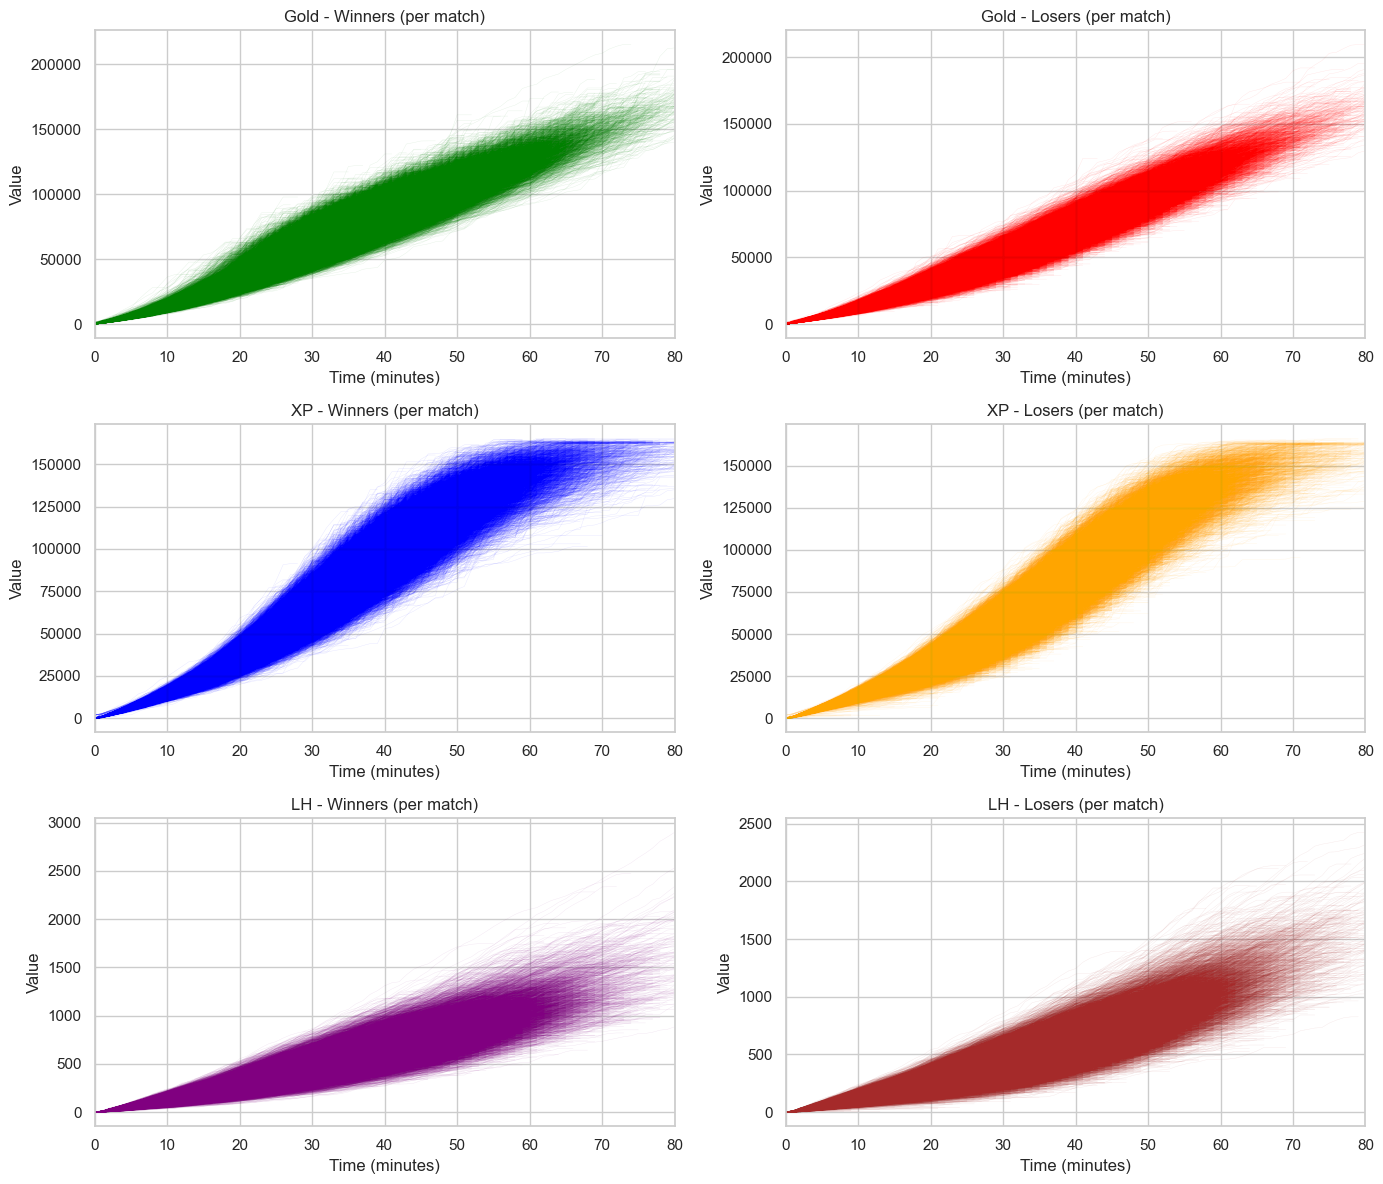

In [15]:
#plot of all time series

sns.set(style="whitegrid")

player_time_means = player_time_means[player_time_means['times_minutes'] <= 80]

variables = [
    ("mean_gold_w", "Gold - Winners", "green"),
    ("mean_gold_l", "Gold - Losers", "red"),
    ("mean_xp_w",   "XP - Winners", "blue"),
    ("mean_xp_l",   "XP - Losers", "orange"),
    ("mean_lh_w",   "LH - Winners", "purple"),
    ("mean_lh_l",   "LH - Losers", "brown")
]

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=False)

for i, (col, title, color) in enumerate(variables):
    ax = axes[i // 2, i % 2]
    for match_id, group in player_time_means.groupby('match_id'):
        ax.plot(group['times_minutes'], group[col], color=color, linewidth=0.3, alpha=0.1)
    ax.set_title(f"{title} (per match)")
    ax.set_xlabel("Time (minutes)")
    ax.set_ylabel("Value")
    ax.set_xlim(0, 80)

plt.tight_layout()
plt.show()

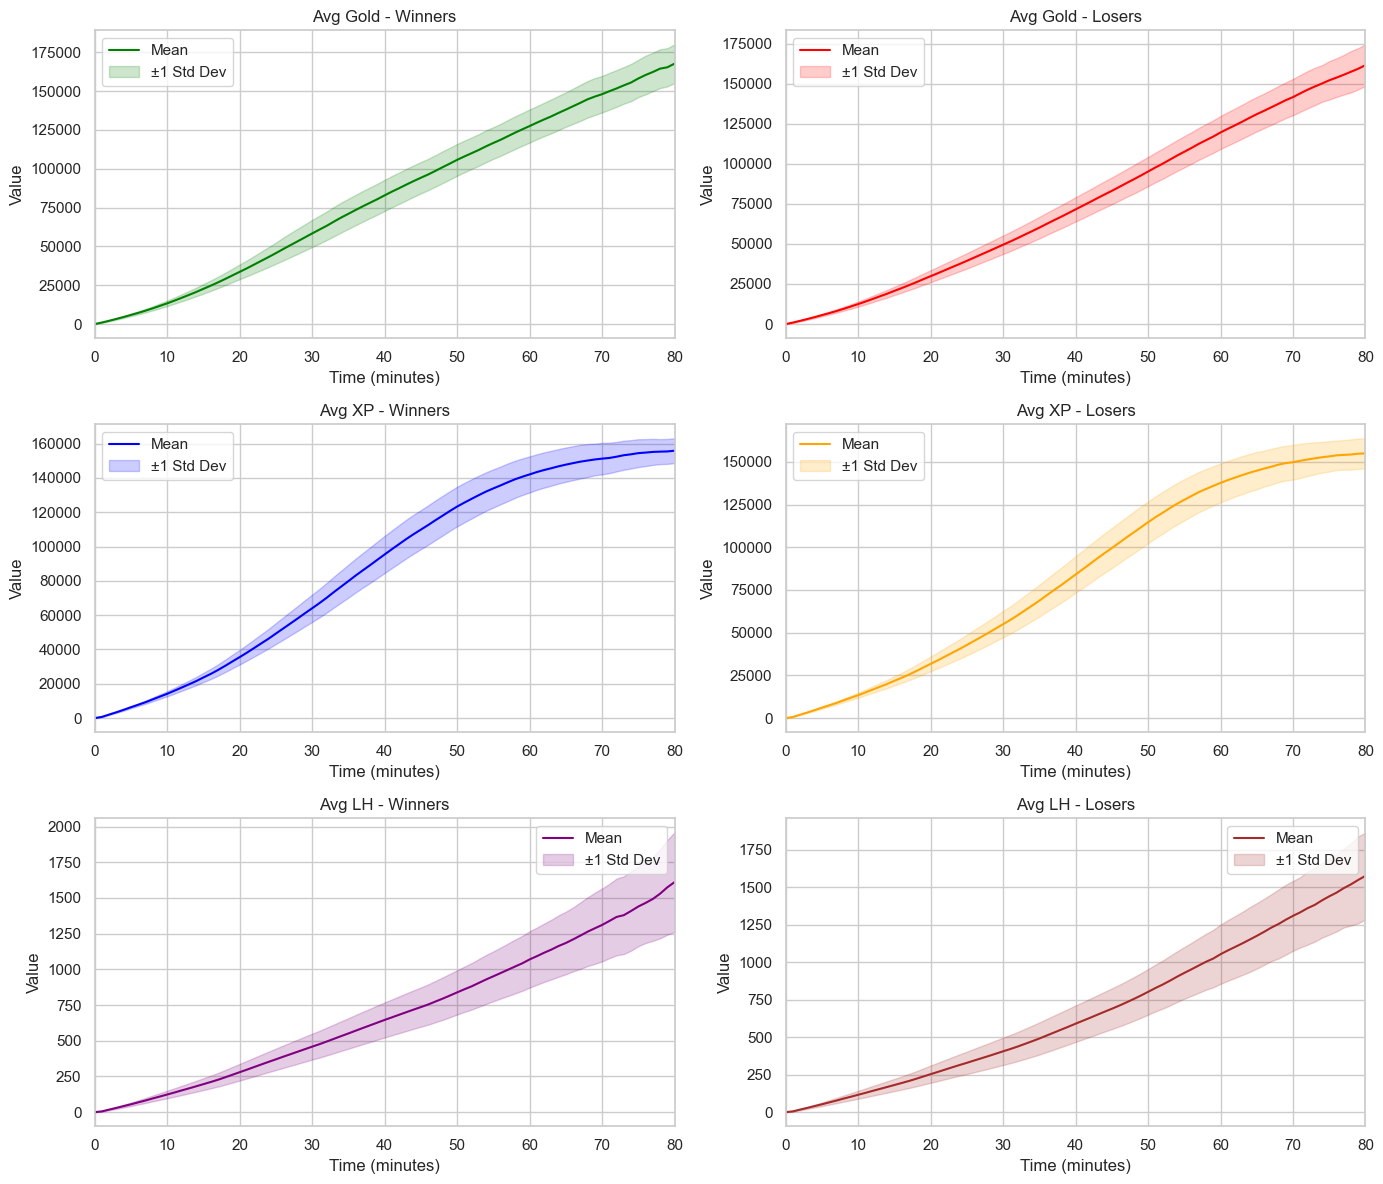

In [14]:
#means and standard deviations of time series

def plot_mean_std(ax, data, color, title, ylabel):

    mean_values = data.groupby('times_minutes')[col].mean()
    std_values = data.groupby('times_minutes')[col].std()
    
    ax.plot(mean_values.index, mean_values, color=color, label='Mean')
    ax.fill_between(mean_values.index, mean_values - std_values, mean_values + std_values, color=color, alpha=0.2, label='±1 Std Dev')
    ax.set_title(title)
    ax.set_xlabel("Time (minutes)")
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_xlim(0, 80)

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
plot_config = [
    ("mean_gold_w", "Avg Gold - Winners", 'green', axes[0, 0]),
    ("mean_gold_l", "Avg Gold - Losers", 'red', axes[0, 1]),
    ("mean_xp_w",   "Avg XP - Winners",   'blue', axes[1, 0]),
    ("mean_xp_l",   "Avg XP - Losers",    'orange', axes[1, 1]),
    ("mean_lh_w",   "Avg LH - Winners",   'purple', axes[2, 0]),
    ("mean_lh_l",   "Avg LH - Losers",    'brown', axes[2, 1]),
]

for col, title, color, ax in plot_config:
    plot_mean_std(ax, player_time_means, color, title, "Value")
plt.tight_layout()
plt.show()

# Analysis

Processing 49701 matches with lag_max = 15...

Generating ACF plots...


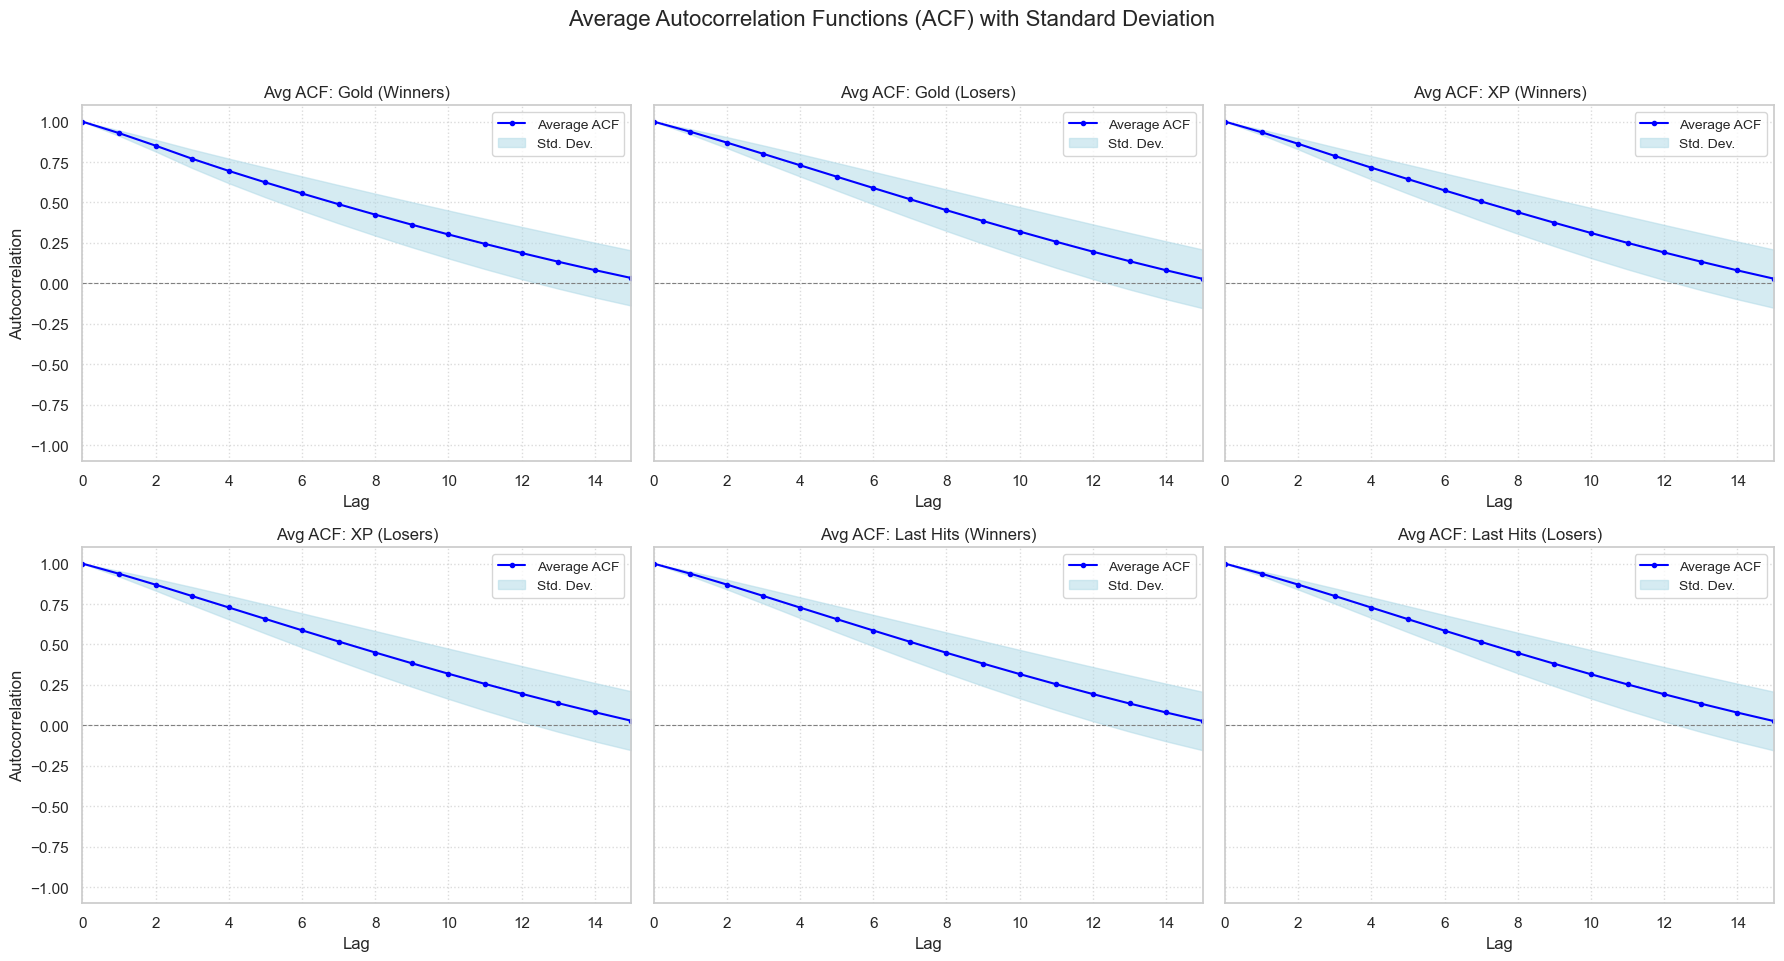


Generating PACF plots...


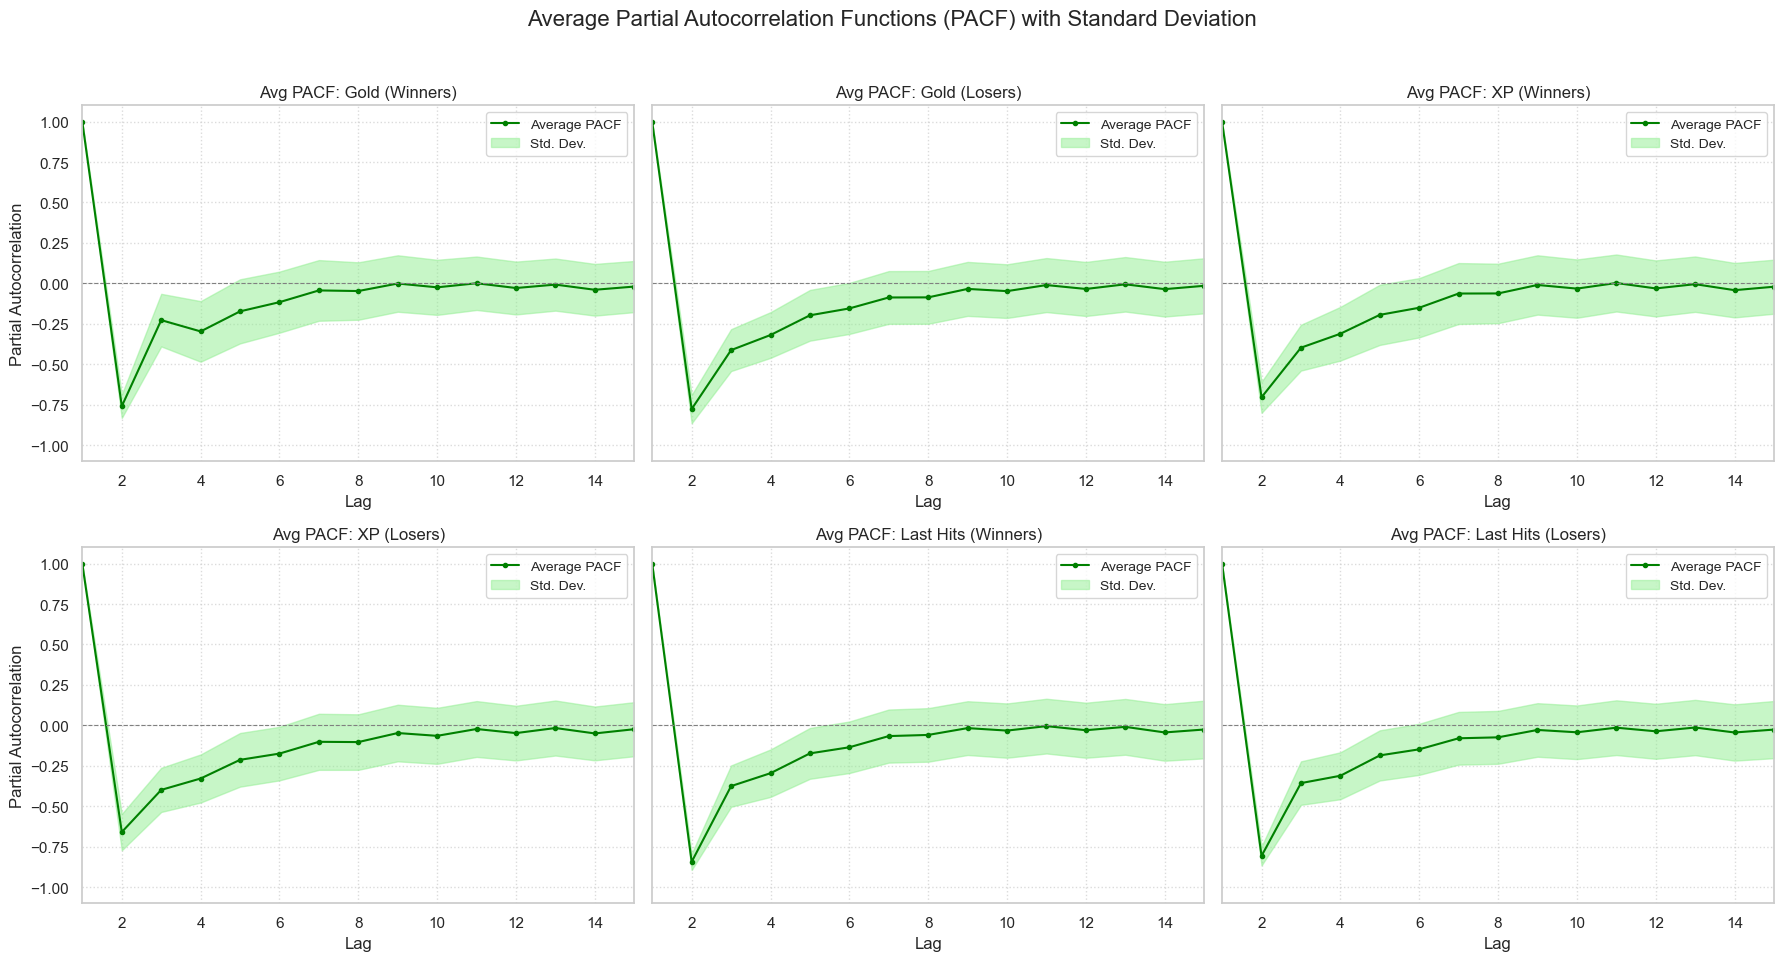

In [60]:
#ACF and PACF

mean_match_length = 41
std_dev_match_length = 10


lower_bound = mean_match_length - (2 * std_dev_match_length)

player_time_means_filtered = player_time_means[(player_time_means.groupby('match_id')['times_minutes'].transform('max') >= lower_bound)]


lag_max = 15

columns_to_analyze = [
    'mean_gold_w', 'mean_gold_l',
    'mean_xp_w', 'mean_xp_l',
    'mean_lh_w', 'mean_lh_l'
]

all_acf_results = {col: [] for col in columns_to_analyze}
all_pacf_results = {col: [] for col in columns_to_analyze}

grouped_by_match = player_time_means_filtered.groupby('match_id')

for match_id, match_data in grouped_by_match:
    for col in columns_to_analyze:
        series = match_data[col].dropna()
        
        if len(series) <= lag_max:
            all_acf_results[col].append(np.full(lag_max + 1, np.nan))
            all_pacf_results[col].append(np.full(lag_max + 1, np.nan))
            continue

        try:
            acf_values = acf(series, nlags=lag_max)
            all_acf_results[col].append(acf_values)

            pacf_values = pacf(series, nlags=lag_max, method='burg')
            all_pacf_results[col].append(pacf_values)
        except Exception as e:
            
            all_acf_results[col].append(np.full(lag_max + 1, np.nan))
            all_pacf_results[col].append(np.full(lag_max + 1, np.nan))


            
            
            
average_acf, std_acf = {}, {}
average_pacf, std_pacf = {}, {}

for col in columns_to_analyze:
    valid_acf_arrays = [arr for arr in all_acf_results[col] if arr.shape == (lag_max + 1,)]
    if valid_acf_arrays:
        acf_matrix = np.array(valid_acf_arrays)
        average_acf[col] = np.nanmean(acf_matrix, axis=0)
        std_acf[col] = np.nanstd(acf_matrix, axis=0)
    else:
        average_acf[col] = np.full(lag_max + 1, np.nan)
        std_acf[col] = np.full(lag_max + 1, np.nan)

    valid_pacf_arrays = [arr for arr in all_pacf_results[col] if arr.shape == (lag_max + 1,)]
    if valid_pacf_arrays:
        pacf_matrix = np.array(valid_pacf_arrays)
        average_pacf[col] = np.nanmean(pacf_matrix, axis=0)
        std_pacf[col] = np.nanstd(pacf_matrix, axis=0)
    else:
        average_pacf[col] = np.full(lag_max + 1, np.nan)
        std_pacf[col] = np.full(lag_max + 1, np.nan)


        
        
        
        
plot_titles = {
    'mean_gold_w': 'Gold (Winners)', 'mean_gold_l': 'Gold (Losers)',
    'mean_xp_w': 'XP (Winners)', 'mean_xp_l': 'XP (Losers)',
    'mean_lh_w': 'Last Hits (Winners)', 'mean_lh_l': 'Last Hits (Losers)'
}

fig_acf, axes_acf = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes_acf = axes_acf.flatten()

for i, col in enumerate(columns_to_analyze):
    ax = axes_acf[i]
    if not np.all(np.isnan(average_acf[col])):
        lags = np.arange(len(average_acf[col]))
        ax.plot(lags, average_acf[col], label='Average ACF', color='blue', marker='o', markersize=3, linestyle='-')
        ax.fill_between(lags, average_acf[col] - std_acf[col], average_acf[col] + std_acf[col], color='lightblue', alpha=0.5, label='Std. Dev.')
        ax.axhline(0, linestyle='--', color='gray', linewidth=0.8)
        ax.set_title(f'Avg ACF: {plot_titles[col]}')
        ax.set_xlabel('Lag')
        if i % 3 == 0: ax.set_ylabel('Autocorrelation')
        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim([0, lag_max])
        ax.grid(True, linestyle=':', alpha=0.7)
        ax.legend(fontsize='small')
    else:
        ax.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Avg ACF: {plot_titles[col]}')

fig_acf.suptitle('Average Autocorrelation Functions (ACF) with Standard Deviation', fontsize=16, y=0.99)
fig_acf.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


fig_pacf, axes_pacf = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes_pacf = axes_pacf.flatten()

for i, col in enumerate(columns_to_analyze):
    ax = axes_pacf[i]
    if not np.all(np.isnan(average_pacf[col])):
        lags = np.arange(len(average_pacf[col]))
        ax.plot(lags[1:], average_pacf[col][1:], label='Average PACF', color='green', marker='o', markersize=3, linestyle='-')
        ax.fill_between(lags[1:], (average_pacf[col] - std_pacf[col])[1:], (average_pacf[col] + std_pacf[col])[1:], color='lightgreen', alpha=0.5, label='Std. Dev.')
        ax.axhline(0, linestyle='--', color='gray', linewidth=0.8)
        ax.set_title(f'Avg PACF: {plot_titles[col]}')
        ax.set_xlabel('Lag')
        if i % 3 == 0: ax.set_ylabel('Partial Autocorrelation')
        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim([1, lag_max])
        ax.grid(True, linestyle=':', alpha=0.7)
        ax.legend(fontsize='small')
    else:
        ax.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Avg PACF: {plot_titles[col]}')

fig_pacf.suptitle('Average Partial Autocorrelation Functions (PACF) with Standard Deviation', fontsize=16, y=0.99)
fig_pacf.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [57]:
#hurst exponent calculation

series_info = {
    'Gold - Winners': 'mean_gold_w',
    'Gold - Losers': 'mean_gold_l',
    'XP - Winners': 'mean_xp_w',
    'XP - Losers': 'mean_xp_l',
    'LH - Winners': 'mean_lh_w',
    'LH - Losers': 'mean_lh_l',
}

hurst_results = {group_name: [] for group_name in series_info.keys()}

grouped = player_time_means_filtered.groupby('match_id')

for match_id, match_df in grouped:
    for group_name, column in series_info.items():
        series = match_df[column].dropna().values
        if len(series) > 21:
            hurst = nolds.hurst_rs(series)
            hurst_results[group_name].append(hurst)

for group_name, hurst_vals in hurst_results.items():
    hurst_array = np.array(hurst_vals)
    mean_hurst = np.mean(hurst_array)
    std_hurst = np.std(hurst_array)
    count = len(hurst_array)
    print(f"{group_name}: mean Hurst = {mean_hurst:.4f}, std = {std_hurst:.4f}")


/Users/daniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/daniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/daniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/daniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/daniel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not w

Gold - Winners: mean Hurst = 0.8362, std = 0.0221 (n=49701)
Gold - Losers: mean Hurst = 0.8379, std = 0.0234 (n=49701)
XP - Winners: mean Hurst = 0.8373, std = 0.0228 (n=49701)
XP - Losers: mean Hurst = 0.8370, std = 0.0271 (n=49701)
LH - Winners: mean Hurst = 0.8360, std = 0.0216 (n=49701)
LH - Losers: mean Hurst = 0.8373, std = 0.0254 (n=49701)
